# Regularized Linear Models

A good model generalized well. The generalization error can be summarized as the sum of bias error, variance error, and irreducible error. A **high-bias model** is usually the result of a model that misses important information and thus underfits while a **high-variance model** is too sensitive, thus has high variance and overfits the training data. 

There is a **trade-off between bias and variance** since reducing the model complexity reduces variance but increases bias. The **irreducible error**, however, is the result not of the model but noisy data and can be reduced by cleaning up the data.

**Regularization** is a way to reduce overfitting by constraining the weights of a linear model.

### Table of Contents
0. Linear Regression
1. Ridge Regression (Tikhonov Regularization)
2. Lasso Regression
3. Elastic Net
4. Other Regression Models with Penalty Hyperparameter
4. Application Examples

# 0. Linear Regression

In [271]:
# evaluate an ridge regression model on the dataset
import numpy as np
from pandas import read_csv

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
input_df = read_csv(url, header=None)
#print(input_df)

data = input_df.values

X = data[0:35, 12] # choose one feature
y = data[0:35, 13] # target

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

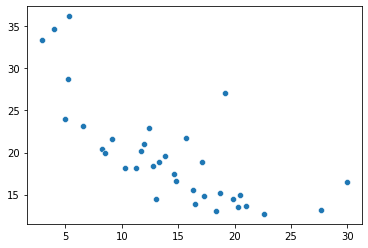

In [272]:
import seaborn as sns
sns.scatterplot(X,y)

### Simple Linear Regression

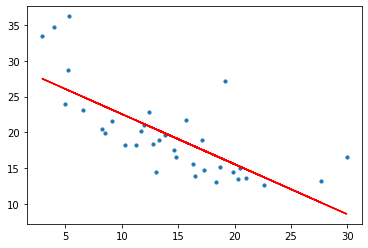

RMSE: 4.109901007971022
R2 score: 0.5397260819538162


In [273]:
# Simple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

lin_reg = LinearRegression()

# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

lin_reg.fit(X_re, y_re)

y_pred = lin_reg.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
plt.plot(X_re, y_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

### Polynomial Regression (Linear Regression after Polynomial Transformation)

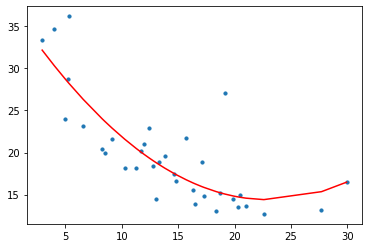

RMSE: 3.7775471605955646
R2 score: 0.6111577631639977


In [274]:
# Polynomial regression
import operator
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

lin_reg = LinearRegression()

# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

# polynomial transformation
polynomial_features= PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_re)

lin_reg.fit(X_poly, y_re)

y_poly_pred = lin_reg.predict(X_poly)

# Plot fit over data:
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_poly_pred), key=sort_axis)
X_re_sort, y_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_poly_pred))
r2 = r2_score(y_re, y_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

# 1. Ridge Regression (Tikhonov Regularization)

During training the model, a regularization term is added to the cost function which keeps the weights as small as possible (thus preventing overfitting). This adapted cost function is called ridge regression cost function, it includes **regularizer penalty**, which is moderated by alpha (or lamda).

Thus, when we fit a model with ridge regression, we minimize the cost function: 
### cost = sum of squared residuals + lamda * (slope)^2


This introduces a small amount of Bias but reduces the Variance significantly and thus reduces the chance of overfitting the training data.

A ridge model with **alpha=0 is equivalent to the simple linear regression model** (see example below).

The **larger the hyperparameter alpha, the closer the weights end up at zero** and the result is a flat line through the data's mean.

This leads to a ridge regression model having smaller weights than without regularization (or same weights when lambda = 1).

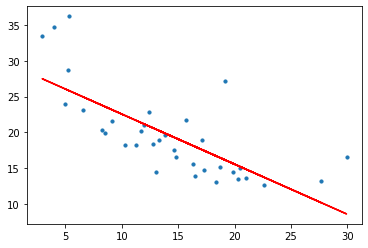

RMSE: 4.109902204828202
R2 score: 0.5397258138781507


In [275]:
# Model with ridge regularization
from sklearn.linear_model import Ridge

# define model with alpha=1
ridge_reg = Ridge(alpha=1.0)

# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

# fit ridge model
ridge_reg.fit(X_re, y_re)

# predict y
y_ridge_pred = ridge_reg.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
plt.plot(X_re, y_ridge_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_ridge_pred))
r2 = r2_score(y_re, y_ridge_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

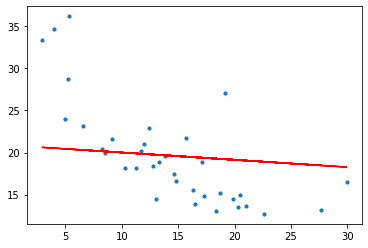

RMSE: 5.664306099570402
R2 score: 0.12572698850601627

Data mean is : 19.63714285714286


In [276]:
# define model with very large alpha
ridge_reg = Ridge(alpha=10000)

# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

# fit ridge model
ridge_reg.fit(X_re, y_re)

# predict y
y_ridge_pred = ridge_reg.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
plt.plot(X_re, y_ridge_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_ridge_pred))
r2 = r2_score(y_re, y_ridge_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

print("\nData mean is : " + str(np.mean(y_re)))

By controlling the model weights, ridge regularization reduces the variance of a model. 

Let's try ridge regularization after polynomial transformation with degree=10 versus without regularization.

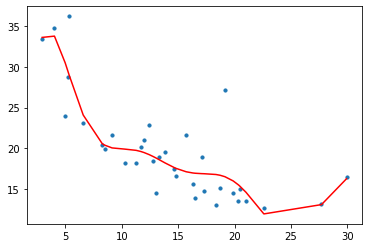

RMSE: 4.00674477872459
R2 score: 0.5625413562835297


In [60]:
# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

# polynomial transformation
polynomial_features= PolynomialFeatures(degree=10)
X_poly = polynomial_features.fit_transform(X_re)

#----------

# Model without regularization

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_re)

y_poly_pred = lin_reg.predict(X_poly)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_poly_pred), key=sort_axis)
X_re_sort, y_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_poly_pred))
r2 = r2_score(y_re, y_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.05472e-29): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


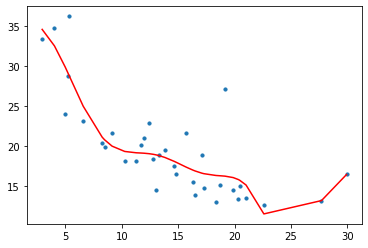

RMSE: 3.9183157683812606
R2 score: 0.5816377340057715


In [72]:
# Model with ridge regularization
from sklearn.linear_model import Ridge

# define model with alpha=xxx
ridge_reg = Ridge(alpha=10)

# fit ridge model
ridge_reg.fit(X_poly, y_re)

# predict y
y_ridge_poly_pred = ridge_reg.predict(X_poly)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_ridge_poly_pred), key=sort_axis)
X_re_sort, y_ridge_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_ridge_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_ridge_poly_pred))
r2 = r2_score(y_re, y_ridge_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

# 2. Lasso Regression

**Lasso Regression** stands for **Least Absolute Shrinkage and Selection Operator Regression**. Like Ridge, the model is regularized by adding a regularization term to the cost function, but it uses the L1 norm of the weight vector instead of half the square of the L2 norm.

Lasso regression tends to eliminate the weights of the least important features by setting them to zero. Thus, **Lasso performs feature selection** and outputs a sparse model with only a few nonzero feature weights.

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266.16215874538346, tolerance: 0.12844417142857145
  model = cd_fast.enet_coordinate_descent(


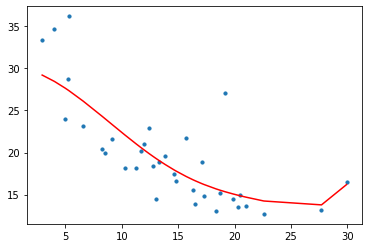

RMSE: 3.6695733053250272
R2 score: 0.6330686840293992


In [84]:
# Polynomial regression as before but using Lasso regularization

from sklearn.linear_model import Lasso

# define model with alpha=10
lasso_reg = Lasso(alpha=10)

# fit ridge model
lasso_reg.fit(X_poly, y_re)

# predict y
y_lasso_poly_pred = lasso_reg.predict(X_poly)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_lasso_poly_pred), key=sort_axis)
X_re_sort, y_lasso_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_lasso_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_lasso_poly_pred))
r2 = r2_score(y_re, y_lasso_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

# 3. Elastic Net

Elastic Net is the middle ground between Ridge Regression and Lasso Regression. Its **regularization term is a mixture of those of Ridge and Lasso** and the mix ratio can be controlled by r.

When r=0, Elastic Net is equivalent to Lasso Regression
When r=1, Elastic Net is equivalent to Ridge Regression

We should avoid using Linear Regression without regularization. **Ridge Regression** is a good default but when we think that only a small number if features are relevant, we could use **Lasso Regression**. However, Lasso can behave too erratically when the number of features is greater than the number of training instances or when several features are strongly correlated. In that case, **Elastic Net** can be used instead of Lasso to control the behavior to be less extreme.

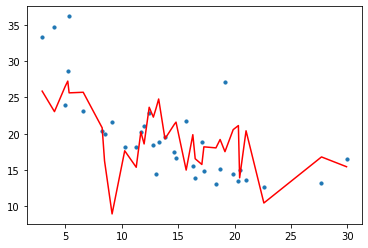

RMSE: 4.11201562278132
R2 score: 0.5392523223998349


In [97]:
from sklearn.linear_model import ElasticNet

# define elastic net model
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5) # Lasso 50 : 50 Ridge

# fit model
elastic_net.fit(X_re, y_re)

# predict y
y_elas_pred = elastic_net.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_elas_pred), key=sort_axis)
X_re_sort, y_lasso_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_elas_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_elas_pred))
r2 = r2_score(y_re, y_elas_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

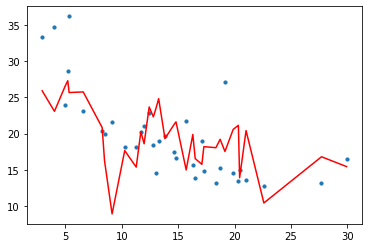

RMSE: 4.111429299795064
R2 score: 0.5393837069660432


In [98]:
# define elastic net model
elastic_net = ElasticNet(alpha=1, l1_ratio=0.1) # Lasso 10 : 90 Ridge

# fit model
elastic_net.fit(X_re, y_re)

# predict y
y_elas_pred = elastic_net.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_elas_pred), key=sort_axis)
X_re_sort, y_lasso_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_elas_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_elas_pred))
r2 = r2_score(y_re, y_elas_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

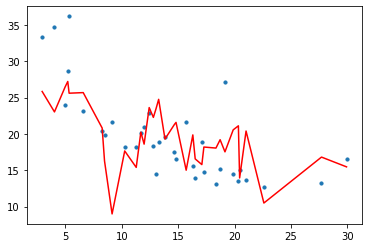

RMSE: 4.1127112209940595
R2 score: 0.5390964268982945


In [99]:
# define elastic net model
elastic_net = ElasticNet(alpha=1, l1_ratio=0.9) # Lasso 90 : 10 Ridge

# fit model
elastic_net.fit(X_re, y_re)

# predict y
y_elas_pred = elastic_net.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_elas_pred), key=sort_axis)
X_re_sort, y_lasso_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_elas_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_elas_pred))
r2 = r2_score(y_re, y_elas_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

# 4. Other Regression Models with Penalty Hyperparameter

Ridge and Lasso regularization can also be implemented using **SGDRegressor and the respective penalty** hyperparameter set


RMSE: 4.238252575163028e+37
R2 score: -4.89471389934018e+73


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


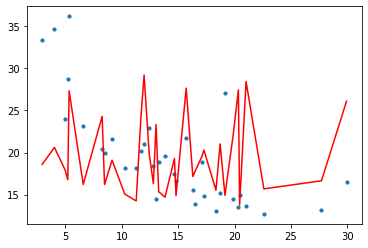

In [92]:
from sklearn.linear_model import SGDRegressor

# similar to Ridge()

sgd_reg = SGDRegressor(penalty="l2")

sgd_reg.fit(X_poly, y_re)

y_pred = sgd_reg.predict(X_poly)

rmse = np.sqrt(mean_squared_error(y_re, y_pred))
r2 = r2_score(y_re, y_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_lasso_poly_pred), key=sort_axis)
X_re_sort, y_lasso_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_lasso_poly_pred, color='r')
plt.show()

RMSE: 5.1932048512088335e+36
R2 score: -7.348937452226766e+71


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


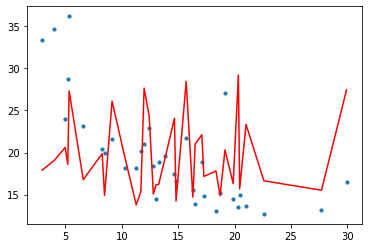

In [91]:
# similar to Lasso()

sgd_reg = SGDRegressor(penalty="l1")

sgd_reg.fit(X_poly, y_re)

y_pred = sgd_reg.predict(X_poly)

rmse = np.sqrt(mean_squared_error(y_re, y_pred))
r2 = r2_score(y_re, y_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_lasso_poly_pred), key=sort_axis)
X_re_sort, y_lasso_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_lasso_poly_pred, color='r')
plt.show()

# 5. Application Example

We will apply and optimize various linear regression model to the housing data in a multivariate regression problem. For that, I downloaded the Melbourne Housing Data https://www.kaggle.com/anthonypino/melbourne-housing-market as the dataset for this part of the notebook.

After preparing and transforming the data, we will establish a simple Linear Regression model, followed by a number of other linear models with and without regularization.

**List of models**:
- Linear Regression Model (Simple OLS)
- Stochastic Gradient Descent (without regularization)
- Ridge Regression / L2 Regularization
- Lasso Regression / L1 Regularization
- Stochastic Gradiet Descent with L2 Regularization
- Stochastic Gradiet Descent with L2 Regularization

Note that the following code **does not fully represent how you should handle such a regression problem**. It is just meant to illustrate code example that can be adapted for your own needs.

For example, I will drop all categorical data for simplicity reasons. Of course they are informative and shouldnt be dropped like that. Furthermore, you can see that no other feature selection and engineering was done. The heatmap shows correlation between numeric variables and of course, the higher "Bedroom" the higher "Rooms". 

### TLDR: Before running models in your real projects, you should spend more time on the feature engineering and selection part! This has been ignored here to focus on code application, not on a thorough analysis of the Melbourne housing data.


### 5.1 Data Preparation

In [104]:
import pandas as pd
import os

# get current working directory
path = os.getcwd()

# import Melbourne Housing dataset
housing_data = read_csv(path+"/data/Melbourne_housing_FULL.csv")

housing_data.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [105]:
# summarize dtypes and show missing values
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [109]:
# select only numeric values
housing_data_num = housing_data.select_dtypes(include=[np.number])
housing_data_num.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,NaN,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958,4019.0
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
3,3,NaN,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,-37.8114,145.0116,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0


In [115]:
# deal with missing values through imputation
housing_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          34857 non-null  int64  
 1   Price          27247 non-null  float64
 2   Distance       34856 non-null  float64
 3   Postcode       34856 non-null  float64
 4   Bedroom2       26640 non-null  float64
 5   Bathroom       26631 non-null  float64
 6   Car            26129 non-null  float64
 7   Landsize       23047 non-null  float64
 8   BuildingArea   13742 non-null  float64
 9   YearBuilt      15551 non-null  float64
 10  Lattitude      26881 non-null  float64
 11  Longtitude     26881 non-null  float64
 12  Propertycount  34854 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 3.5 MB


In [116]:
# since Price will be the target for this project, drop all instances without pricing data
housing_data_num = housing_data_num.dropna(subset=["Price"])
housing_data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          27247 non-null  int64  
 1   Price          27247 non-null  float64
 2   Distance       27246 non-null  float64
 3   Postcode       27246 non-null  float64
 4   Bedroom2       20806 non-null  float64
 5   Bathroom       20800 non-null  float64
 6   Car            20423 non-null  float64
 7   Landsize       17982 non-null  float64
 8   BuildingArea   10656 non-null  float64
 9   YearBuilt      12084 non-null  float64
 10  Lattitude      20993 non-null  float64
 11  Longtitude     20993 non-null  float64
 12  Propertycount  27244 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 2.9 MB


In [124]:
# option 1:
# manually fill missing values
# housing_data_num["Distance"].fillna(np.nanmedian(housing_data_num["Distance"]), inplace=True)



# option 2:
# use sklearn API with SimpleImputer (univariate) or IterativeImputer (multivariate)

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

housing_data_imp = imp.fit_transform(housing_data_num)


# to better inspect the data, transform numpy arry back to data frame

housing_data_imp = pd.DataFrame(housing_data_imp)
housing_data_imp.columns = housing_data_num.columns
housing_data_imp

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2.0,1480000.0,2.5,3067.0,2.000000,1.000000,1.00000,202.000000,156.834586,1966.609153,-37.799600,144.998400,4019.0
1,2.0,1035000.0,2.5,3067.0,2.000000,1.000000,0.00000,156.000000,79.000000,1900.000000,-37.807900,144.993400,4019.0
2,3.0,1465000.0,2.5,3067.0,3.000000,2.000000,0.00000,134.000000,150.000000,1900.000000,-37.809300,144.994400,4019.0
3,3.0,850000.0,2.5,3067.0,3.000000,2.000000,1.00000,94.000000,156.834586,1966.609153,-37.796900,144.996900,4019.0
4,4.0,1600000.0,2.5,3067.0,3.000000,1.000000,2.00000,120.000000,142.000000,2014.000000,-37.807200,144.994100,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27242,4.0,1480000.0,6.3,3013.0,4.000000,1.000000,3.00000,593.000000,156.834586,1966.609153,-37.810530,144.884670,6543.0
27243,2.0,888000.0,6.3,3013.0,2.000000,2.000000,1.00000,98.000000,104.000000,2018.000000,-37.815510,144.888260,6543.0
27244,2.0,705000.0,6.3,3013.0,2.000000,1.000000,2.00000,220.000000,120.000000,2000.000000,-37.822860,144.878560,6543.0
27245,3.0,1140000.0,6.3,3013.0,3.046237,1.591683,1.71537,593.488933,156.834586,1966.609153,-37.806963,144.996711,6543.0


In [126]:
# Feature Scaling: Standardization
# for every value, subtract the mean and divide by standard deviation
# this centers the data to a normal ditribution with zero mean and equal variance

from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

housing_data_trans = standard_scaler.fit_transform(housing_data_imp)

# to better inspect the data, transform numpy arry back to data frame

housing_data_trans = pd.DataFrame(housing_data_trans)
housing_data_trans.columns = housing_data_num.columns
housing_data_trans

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,-1.039292,0.670080,-1.293648,-0.421072,-1.253564,-9.662357e-01,-0.831113,-0.128263,-1.011745e-16,0.000000,0.091559,0.015945,-0.789791
1,-1.039292,-0.023655,-1.293648,-0.421072,-1.253564,-9.662357e-01,-1.992908,-0.143333,-2.770725e-01,-2.720836,-0.011651,-0.031258,-0.789791
2,0.008072,0.646696,-1.293648,-0.421072,-0.055399,6.667945e-01,-1.992908,-0.150541,-2.432949e-02,-2.720836,-0.029060,-0.021817,-0.789791
3,0.008072,-0.312061,-1.293648,-0.421072,-0.055399,6.667945e-01,-0.831113,-0.163646,-1.011745e-16,0.000000,0.125133,0.001784,-0.789791
4,1.055436,0.857155,-1.293648,-0.421072,-0.055399,-9.662357e-01,0.330682,-0.155128,-5.280758e-02,1.935811,-0.002947,-0.024649,-0.789791
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27242,1.055436,0.670080,-0.733773,-0.906965,1.142766,-9.662357e-01,1.492477,-0.000160,-1.011745e-16,0.000000,-0.044355,-1.057726,-0.227909
27243,-1.039292,-0.252821,-0.733773,-0.906965,-1.253564,6.667945e-01,-0.831113,-0.162336,-1.880785e-01,2.099202,-0.106281,-1.023834,-0.227909
27244,-1.039292,-0.538110,-0.733773,-0.906965,-1.253564,-9.662357e-01,0.330682,-0.122365,-1.311223e-01,1.363942,-0.197678,-1.115407,-0.227909
27245,0.008072,0.140036,-0.733773,-0.906965,0.000000,-3.626056e-16,0.000000,0.000000,-1.011745e-16,0.000000,0.000000,0.000000,-0.227909


In [128]:
# shuffle data
from sklearn.utils import shuffle
housing_data_trans = shuffle(housing_data_trans, random_state=0)
housing_data_trans.reset_index(drop=True, inplace=True)
housing_data_trans

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,1.055436,-0.374419,0.739585,-0.349088,1.142766,6.667945e-01,0.330682,0.000000,1.465390e-01,0.546986,1.729866,-0.049195,0.158551
1,2.102801,2.104319,0.017640,0.811656,2.340931,2.299825e+00,2.654271,0.000000,5.345530e-01,-1.495402,-1.341323,0.339188,-0.171810
2,0.008072,1.340431,-0.232831,-0.088145,0.000000,-3.626056e-16,0.000000,0.000000,-1.011745e-16,0.000000,0.000000,0.000000,0.053922
3,-2.086656,-1.107128,-0.380167,0.433740,-2.451730,-9.662357e-01,-0.831113,0.000000,-1.011745e-16,0.000000,-1.022490,0.203622,-0.560052
4,0.008072,-0.156166,-0.306499,0.289771,0.000000,-3.626056e-16,0.000000,0.000000,-1.011745e-16,0.000000,0.000000,0.000000,0.633389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27242,-1.039292,-1.029180,-0.998977,-0.511052,-1.253564,-9.662357e-01,-0.831113,-0.194443,-1.011745e-16,0.138509,0.473313,-0.176642,-0.452751
27243,0.008072,-0.218524,0.120775,-0.277104,-0.055399,6.667945e-01,2.654271,0.000000,-1.011745e-16,0.000000,1.445727,0.488915,0.580630
27244,0.008072,-0.240349,1.800402,0.577708,0.000000,-3.626056e-16,0.000000,0.000000,-1.011745e-16,0.000000,0.000000,0.000000,0.912772
27245,1.055436,0.046498,1.269993,0.181795,1.142766,6.667945e-01,0.330682,0.038172,-1.011745e-16,0.546986,0.194769,2.298003,-0.878837


<AxesSubplot:>

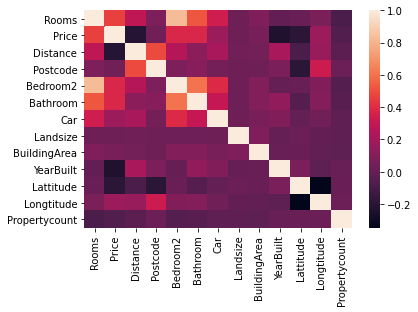

In [246]:
# correlation plot
corr_mat = housing_data_trans.corr()
sns.heatmap(corr_mat)

In [131]:
# Train test split

X = housing_data_trans.drop(columns=["Price"])
y = housing_data_trans["Price"]

X_train = X[:20000].reset_index(drop=True)
X_test = X[20000:].reset_index(drop=True)

y_train = y[:20000].reset_index(drop=True)
y_test = y[20000:].reset_index(drop=True)

### 5.2 Let's start building models
Now that we only have numeric columns left, filled all missing values and standardized the data, and split the data into training and testing data, we are ready to try out a few regression models.

I will start with a simple Linear Regression model as a baseline, followed by a Stochastic Gradient Descent model, Ridge Regression, and Lasso Regression.

In the end we will compare all four models in a summary table and end this notebook with some observations about regularization.

In [262]:
# Simple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# cross validation scores
scores = cross_val_score(lin_reg, X_train, y_train, cv=3)
print(scores.mean())

# predict target values
y_pred_ols = lin_reg.predict(X_test)

# asses model validity
print("MAE: " + str(mean_absolute_error(y_test, y_pred_ols)))
print("MSE: " + str(mean_squared_error(y_test, y_pred_ols)))
print("R2 score: " + str(r2_score(y_test, y_pred_ols)))
print("Explained variance: " + str(explained_variance_score(y_test, y_pred_ols)))

0.49546353908402613
MAE: 0.48919329514913595
MSE: 1.3542989797338068
R2 score: -0.3384746389422084
Explained variance: -0.33818346406827593


In [174]:
# Simple Stochastic Gradient Descent Regression without regularization

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# fit the model
sgd_reg = SGDRegressor(loss="squared_loss", 
                       penalty=None, 
                       fit_intercept=False # since data already centered
                      ) 
sgd_reg.fit(X_train, y_train)

# cross validation scores
scores = cross_val_score(sgd_reg, X_train, y_train, cv=3)
print(scores.mean())

# predict target values
y_pred = sgd_reg.predict(X_test)

# asses model validity
print("MAE: " + str(mean_absolute_error(y_test, y_pred)))
print("MSE: " + str(mean_squared_error(y_test, y_pred)))
print("R2 score: " + str(r2_score(y_test, y_pred)))
print("Explained variance: " + str(explained_variance_score(y_test, y_pred)))

-296287.485789432
MAE: 0.551128682316559
MSE: 1.7089577038185728
R2 score: -0.6889893441665793
Explained variance: -0.6889837935429408


In [223]:
# Ridge Regression / L2 Regularization

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# fit the model
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)

# cross validation scores
scores = cross_val_score(ridge_reg, X_train, y_train, cv=3)
print(scores.mean())

# predict target values
y_pred = ridge_reg.predict(X_test)

# asses model validity
print("MAE: " + str(mean_absolute_error(y_test, y_pred)))
print("MSE: " + str(mean_squared_error(y_test, y_pred)))
print("R2 score: " + str(r2_score(y_test, y_pred)))
print("Explained variance: " + str(explained_variance_score(y_test, y_pred)))

0.4955233920219795
MAE: 0.4890541955543139
MSE: 1.3355592659400506
R2 score: -0.3199538898097618
Explained variance: -0.31966786200108643


In [216]:
# iterate to find optimal alpha

results = pd.DataFrame(columns=["alpha", "score_mean"])
i = 0

for alpha in np.arange(0, 200, 1):
    
    # fit the model
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)

    # cross validation scores
    scores = cross_val_score(ridge_reg, X_train, y_train, cv=3)
    results.at[i, "score_mean"] = scores.mean()
    
    results.at[i, "alpha"] = alpha
    
    i = i+1
    
results

,alpha,score_mean
0,0,0.495464
1,1,0.495470
2,2,0.495476
3,3,0.495483
4,4,0.495489
...,...,...
195,195,0.495404
196,196,0.495399
197,197,0.495395
198,198,0.495390


<AxesSubplot:xlabel='alpha', ylabel='score_mean'>

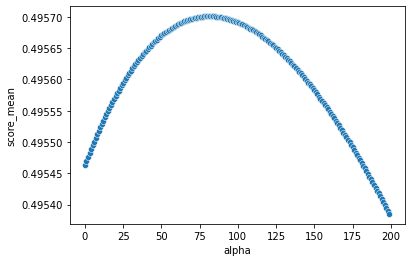

In [217]:
sns.scatterplot(data=results, x="alpha", y="score_mean")

In [218]:
# find alpha with the highest score on training set
best_alpha = results[results["score_mean"]==results["score_mean"].max()]["alpha"]
print("highest score with alpha = "+str(best_alpha))

highest score with alpha = 81    81
Name: alpha, dtype: object


In [219]:
# Ridge Regression / L2 Regularization (Optimized)

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# fit the model
ridge_reg = Ridge(alpha=81)
ridge_reg.fit(X_train, y_train)

# cross validation scores
scores = cross_val_score(ridge_reg, X_train, y_train, cv=3)
print(scores.mean())

# predict target values
y_pred = ridge_reg.predict(X_test)

# asses model validity
print("MAE: " + str(mean_absolute_error(y_test, y_pred)))
print("MSE: " + str(mean_squared_error(y_test, y_pred)))
print("R2 score: " + str(r2_score(y_test, y_pred)))
print("Explained variance: " + str(explained_variance_score(y_test, y_pred)))

0.4957008723990531
MAE: 0.48816984723850254
MSE: 1.2195198529887283
R2 score: -0.2052703423233604
Explained variance: -0.2050164478883716


In [244]:
# Lasso Regression / L1 Regularization

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# fit the model
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train, y_train)

# cross validation scores
scores = cross_val_score(lasso_reg, X_train, y_train, cv=3)
print(scores.mean())

# predict target values
y_pred = lasso_reg.predict(X_test)

# asses model validity
print("MAE: " + str(mean_absolute_error(y_test, y_pred)))
print("MSE: " + str(mean_squared_error(y_test, y_pred)))
print("R2 score: " + str(r2_score(y_test, y_pred)))
print("Explained variance: " + str(explained_variance_score(y_test, y_pred)))

0.41145712269056695
MAE: 0.5082952175063411
MSE: 0.6207438577925479
R2 score: 0.3865092395640871
Explained variance: 0.38653580734266957


In [237]:
# iterate to find optimal alpha

results = pd.DataFrame(columns=["alpha", "score_mean"])
i = 0

for alpha in np.arange(0.1, 10, 0.1):
    
    # fit the model
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)

    # cross validation scores
    scores = cross_val_score(lasso_reg, X_train, y_train, cv=3)
    results.at[i, "score_mean"] = scores.mean()
    
    results.at[i, "alpha"] = alpha
    
    i = i+1
    
results

,alpha,score_mean
0,0.1,0.411457
1,0.2,0.261118
2,0.3,0.132646
3,0.4,0.061234
4,0.5,-0.000246
...,...,...
94,9.5,-0.000246
95,9.6,-0.000246
96,9.7,-0.000246
97,9.8,-0.000246


<AxesSubplot:xlabel='alpha', ylabel='score_mean'>

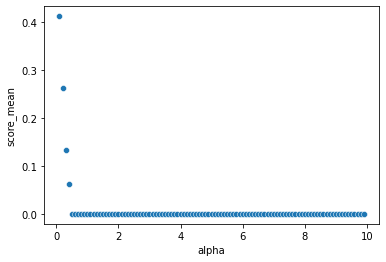

In [238]:
sns.scatterplot(data=results, x="alpha", y="score_mean")

In [245]:
# Lasso Regression / L1 Regularization (Optimized)

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# fit the model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

# cross validation scores
scores = cross_val_score(lasso_reg, X_train, y_train, cv=3)
print(scores.mean())

# predict target values
y_pred = lasso_reg.predict(X_test)

# asses model validity
print("MAE: " + str(mean_absolute_error(y_test, y_pred)))
print("MSE: " + str(mean_squared_error(y_test, y_pred)))
print("R2 score: " + str(r2_score(y_test, y_pred)))
print("Explained variance: " + str(explained_variance_score(y_test, y_pred)))

0.41145712269056695
MAE: 0.5082952175063411
MSE: 0.6207438577925479
R2 score: 0.3865092395640871
Explained variance: 0.38653580734266957


# unused WIP code snippets

In [256]:
# code adapted from Qshick https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db
# 
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)

ridge_df = pd.DataFrame({'variable': X_train.columns, 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []


# iterate lambdas
for alpha in np.arange(0, 200, 1):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))

# organize dataframe
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').reset_index()
ridge_df.head()

variable,estimate,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,estimate,0.546237,-0.442547,0.152678,-0.147928,0.168837,0.078760,0.024089,0.488368,-0.169845,-0.149790,0.093613,-0.022542
1,estimate0,0.546237,-0.442547,0.152678,-0.147928,0.168837,0.078760,0.024089,0.488368,-0.169845,-0.149790,0.093613,-0.022542
2,estimate1,0.546129,-0.442505,0.152654,-0.147800,0.168853,0.078753,0.024088,0.487809,-0.169839,-0.149786,0.093613,-0.022544
3,estimate2,0.546020,-0.442464,0.152631,-0.147673,0.168869,0.078747,0.024087,0.487251,-0.169834,-0.149783,0.093614,-0.022546
4,estimate3,0.545912,-0.442423,0.152607,-0.147546,0.168885,0.078740,0.024086,0.486695,-0.169828,-0.149779,0.093615,-0.022549


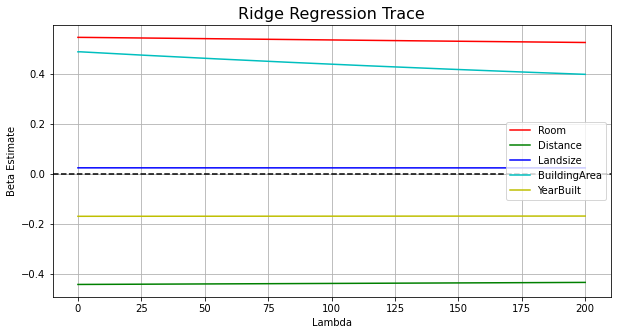

In [260]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.Rooms, 'r', ridge_df.Distance, 'g', ridge_df.Landsize, 'b', ridge_df.BuildingArea, 'c', 
        ridge_df.YearBuilt, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['Room','Distance','Landsize','BuildingArea','YearBuilt'])
ax.grid(True)

Text(0, 0.5, 'MSE')

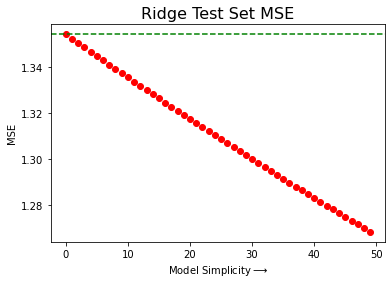

In [268]:
# MSE of Ridge and OLS
ridge_mse_test = [mean_squared_error(y_test, p) for p in ridge_test_pred]
ols_mse = mean_squared_error(y_test, y_pred_ols)

# plot mse
plt.plot(ridge_mse_test[:50], 'ro')
plt.axhline(y=ols_mse, color='g', linestyle='--')
plt.title("Ridge Test Set MSE", fontsize=16)
plt.xlabel("Model Simplicity$\longrightarrow$")
plt.ylabel("MSE")

# todo

## Why is Ridge called an L2 regularization? Why Lasso L1?

When we talk about norms in machine learning, we are talking about mathematical ways to express distance between two vectors.

**Manhattan distance** or **taxicab geometry** measure distance by summing up the right-angle distances (like a cab driving around a block).

**Euclidean distance** is the simplest form, it is how we would measure the distance between two points (diagonal distance)

When we fit a model, we have a cost function which measures the distance between the predicted and actual point. Thus, our definition of distance is relevant for the cost function.

Euclidean distance is also called the **L2 norm** and Manhattan distance is known as **L1 norm**. 

Thus, **Ridge Regression uses Euclidean Distance** and **Lasso Regressionen uses Manhattan distance** when expressing the regularization term which is added to the cost function.

More: https://www.kaggle.com/residentmario/l1-norms-versus-l2-norms


## When do we use Ridge, when Lasso?

- L1 is more robust against outliers (extreme values) than L2 since L2 squares values
- L2 is more stable than L1 (? resistance to horizontal adjustments ?)
- there is ony one numeric solution for L2 (one diagonal), but many for L1 (many ways to get from A to B in Manhattan)
- L1 is more difficult to compute than L2, since L2 has a closed form solution but L1 can only be solved piece-wise
- L1 leads to more sparsity (elimination of many feature weights) then L2 

## What does this mean? Example?
"Ridge regression and lasso regression are two different techniques for increasing the robustness against colinearity of ordinary least squares regression"

In [94]:
# regression example using lasso and ridge regression (train test split, cross validation, pipeline, etc)
#
#
#
#